In [32]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

# Wrangling
import pandas as pd
import numpy as np

# Exploring
import scipy.stats as stats

# Visualizing
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# default pandas decimal number display format
#pd.options.display.float_format = '{:20,.2f}'.format
import acquire
import wrangle_zillow

### Plot all continuous or numeric/ordered variables against each other in scatterplots, or through a pairplot.

In [2]:
df = acquire.get_zillow_data()

In [3]:
df.fips.value_counts()

6,037.00    50551
6,059.00    20593
6,111.00     6237
Name: fips, dtype: int64

In [4]:
df = wrangle_zillow.wrangle_zillow(df)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51480 entries, 0 to 52118
Data columns (total 32 columns):
propertylandusetypeid           51480 non-null float64
heatingorsystemtypeid           51480 non-null float64
parcelid                        51480 non-null int64
id                              51480 non-null int64
logerror                        51480 non-null float64
transactiondate                 51480 non-null object
bathroomcnt                     51480 non-null float64
bedroomcnt                      51480 non-null float64
buildingqualitytypeid           51480 non-null float64
calculatedfinishedsquarefeet    51480 non-null float64
finishedsquarefeet12            51480 non-null float64
fips                            51480 non-null object
fullbathcnt                     51480 non-null float64
latitude                        51480 non-null float64
longitude                       51480 non-null float64
lotsizesquarefeet               51480 non-null float64
propertycountylan

In [82]:
df_plot = df[['logerror',  'bathroomcnt', 'bedroomcnt', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12',  'fullbathcnt', 
       'lotsizesquarefeet', 'roomcnt','yearbuilt', 'structuretaxvaluedollarcnt', 'taxvaluedollarcnt',
       'landtaxvaluedollarcnt', 'taxamount',
        'regionid_city']]

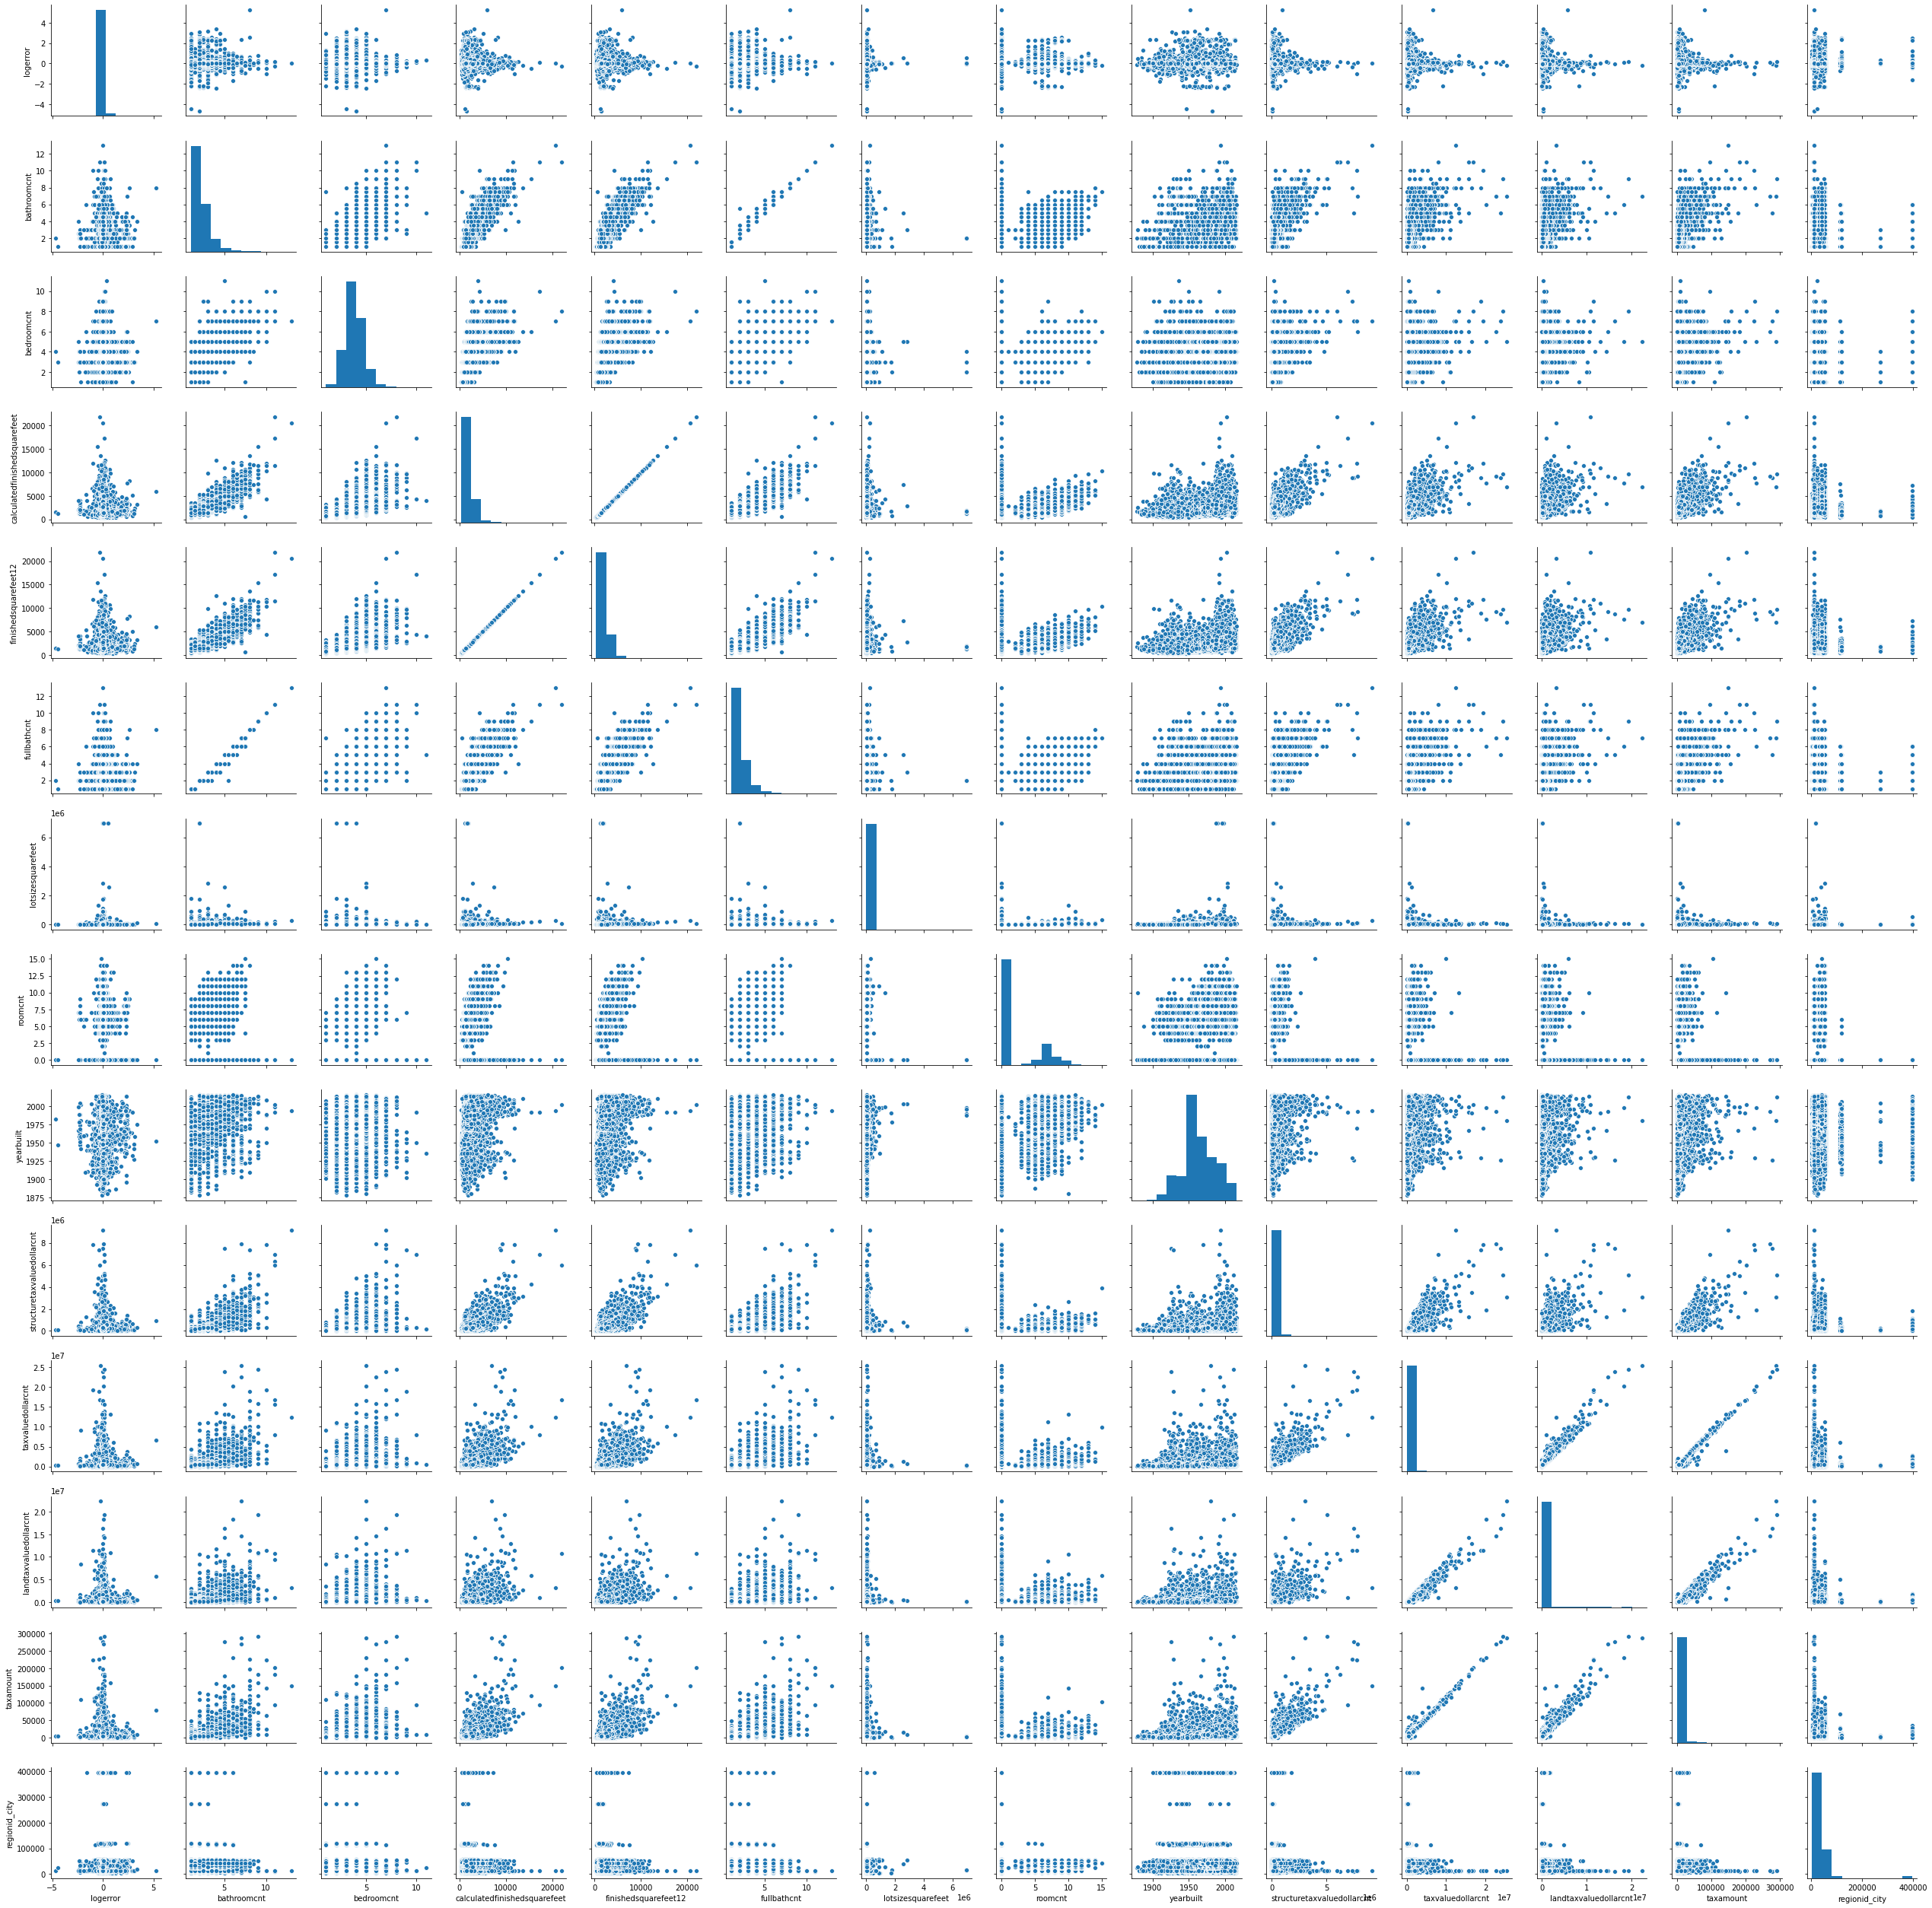

In [84]:
sns.pairplot(df_plot)

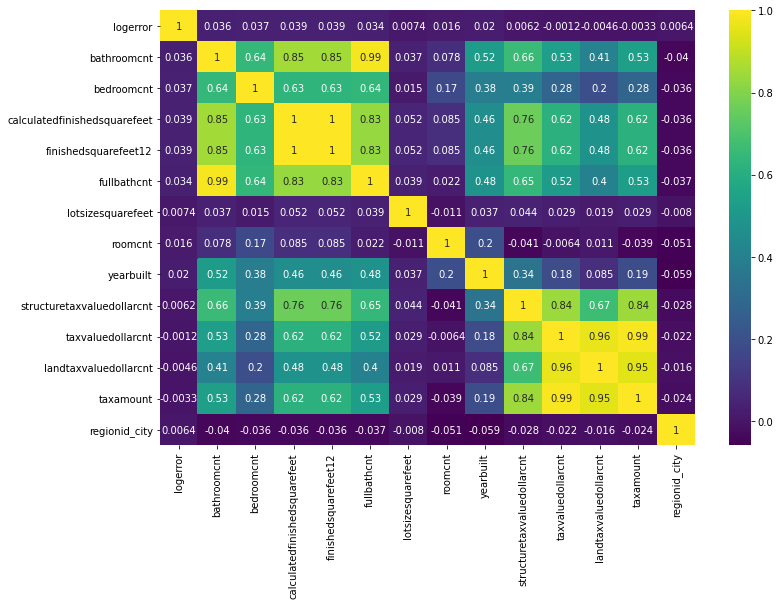

In [83]:
plt.figure(figsize =(12,8))
sns.heatmap(df_plot.corr(), cmap = 'viridis', annot = True)

### Plot latitude against longitude.

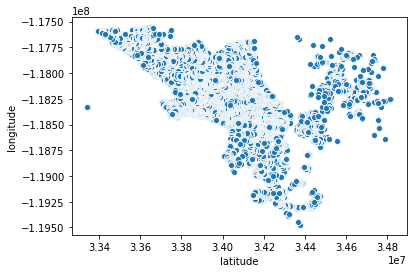

In [6]:
sns.scatterplot(x = 'latitude', y = 'longitude', data = df)

### Create a useable plot with 4 dimensions, e.g. x, y, color, size.

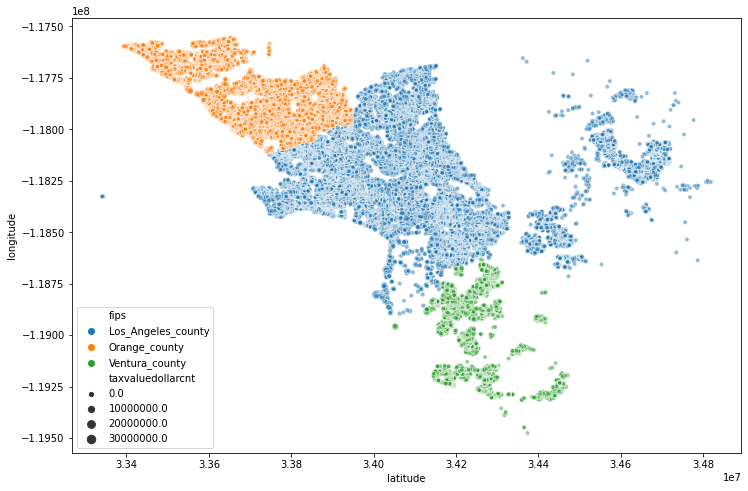

In [7]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'latitude', y = 'longitude', data = df, size ='taxvaluedollarcnt', hue='fips', alpha=0.5)
plt.show()

### Compute the mean(logerror) by zipcode and the overall mean(logerror). Write a loop that will run a t-test between the overall mean and the mean for each zip code. We want to identify the zip codes where the error is significantly higher or lower than the expected error.

In [10]:
overall_logerror = df.logerror.mean()
overall_logerror

0.018192613025877696

In [18]:
df.regionidzip = df.regionidzip.astype(int)

In [37]:
pd.options.display.float_format = '{:20,.5f}'.format
zip_means = pd.DataFrame(df.groupby('regionidzip').logerror.mean()).reset_index()

In [39]:
zip_means.head()

,regionidzip,logerror
0,95982,0.00078
1,95983,0.00523
2,95984,-0.07781
3,95985,-0.03518
4,95986,-0.00632


$H_0$: There is no significant difference in overall mean logerror and zipcode logerror\
$H_a$: There is no significant difference in overall mean logerror and zipcode logerror

In [65]:
zip_list = []
for i in range(0, len(zip_means.regionidzip)):
    if stats.ttest_1samp(df[df.regionidzip == zip_means.regionidzip[i]].logerror, overall_logerror)[-1]<0.05:
        zip_list.append(df.regionidzip[i])

In [66]:
# List of zip codes where logerror mean is significantly higher or lower than mean logerror
zip_list

[96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96346,
 96346,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96339,
 96342,
 96342,
 96342,
 96342,
 96342,
 96342,
 96338,
 96338,
 96338,
 96338,
 96338,
 96342,
 96342,
 96338,
 96342,
 96342,
 96342,
 96339,
 96339,
 96342,
 96342,
 96342,
 96389,
 96342,
 96342,
 96342,
 96389]

Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

In [71]:
stats.ttest_ind(df[df.fips=='Los_Angeles_county'].logerror, df[df.fips=='Orange_county'].logerror)

Ttest_indResult(statistic=-6.493180256148895, pvalue=8.487571229715423e-11)

p value is almost zero, this means that mean for LA county is different than Orange county

In [72]:
stats.ttest_ind(df[df.fips=='Los_Angeles_county'].logerror, df[df.fips=='Ventura_county'].logerror)

Ttest_indResult(statistic=-0.055214089412155845, pvalue=0.9559681971769408)

p value is very high, this means that mean for LA county is not different than Ventura county

In [74]:
stats.ttest_ind(df[df.fips=='Orange_county'].logerror, df[df.fips=='Ventura_county'].logerror)

Ttest_indResult(statistic=3.5323143081299953, pvalue=0.00041296326438494484)

p value is <0.05, this means that mean for Ventura county is different than Orange county

#### Use one way ANOVA to test three different means

In [75]:
stats.f_oneway(df[df.fips=='Orange_county'].logerror, df[df.fips=='Orange_county'].logerror, df[df.fips=='Los_Angeles_county'].logerror)

F_onewayResult(statistic=31.142518759287274, pvalue=3.0330463924174475e-14)